# Elektroautos

Dein Chef hat die neuesten Daten über den Elektroautomarkt. Wie immer ist die Zeit knapp und um 14 Uhr hält dein Chef eine Presskonferenz über die neuen Zahlen. Da dein Chef selbst heute einen vollen Terminkalendar hat, bittet er dich die Daten auf- und für die Präsentation vorzubereiten. Dein Chef bekommt die Daten von dir um 13:50 Uhr und hat damit nur 10min Zeit deine Unterlagen durchzusehen.

Der Datensatz besteht aus zwei Teilen. Füge diese zunächst zusammen.

Erkunde den Datensatz. Hier kannst du beim Thema fehlende Werte weitere Vorgehensweisen ausprobieren, um die Daten zu befüllen. (Häufigkeiten bestimmen: crosstab(),idxmax() ...)

Weiterhin bietet der Datensatz ein neues Features! Erstelle dieses.

Werte den Datensatz aus! Welche Erkenntnisse kannst du daraus gewinnen?
                            
Vergiss nicht dein Vorgehen zu dokumentieren: Dokumentiere deine Schritte - bringe deine Gedanken auf Papier!

### Wofür stehen die Spalten?


- Brand ... Manufacturer of the vehicle
- Model ... Model name
- AccelSec ... Acceleration as 0-100 km/h
- TopSpeed_KmH ... The top speed in km/h
- Rang_Km ... Range in km
- Efficiency_WhKm ... Efficiency Wh/km --> wie viel kw brauch ich pro km bzw. Stromverbrauch pro km
- FastCharge_KmH ... Charge km/h --> Reichweite in km nach einer Stunde Schnellladen (ist ein theoretischer Wert)
- RapidCharge ... Yes / No --> besitzt Schnellladefunktion ja/nein
- PowerTrain ... Front (FWD), rear (RWD) , or all wheel drive (AWD)
- PlugType ... Plug type (Stecktyp zum Laden an der Ladesäule; abhängig vom Land in dem das Auto später fährt)
- BodyStyle ... Basic size or style (SUV, Schrägdach etc.)
- Seats ... Number of seats
- PriceEuro ... Price in Germany before tax incentives


### to DO

                                       1. Data Preprocessing
                                           1.1) Datensatz einlesen
                                           1.2) fehlende Werte
                                           1.3) Ausreißer
                                           1.4) Speicherplatz
                                           1.5) Pairplot - erste visuelle Inspektion
                                           1.6) Features
                                        
                                        2. Visualisierung

## Datensatz einlesen

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [41]:
# 1.1 1. Datei einlesen
# Datei vorher anschauen; pd.read_csv

df_1 = pd.read_csv('ecar_part1.csv',index_col=0)
df_1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101
2,Polestar,2,4.7,210,400,181,102
3,BMW,iX3,6.8,180,360,206,103
4,Honda,e,9.5,145,170,168,104


In [42]:
# 1.1 2. Datei einlesen
# Datei vorher anschauen; pd.read_csv

df_2 = pd.read_csv('ecar_part2.csv',sep='|',index_col=0)  #nicht komma-getrennt
df_2.head()

,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,connector
0,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480,100
1,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000,101
2,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,102
3,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,103
4,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997,104


In [43]:
# 1.1 die zwei Dateien (Dataframes) zusammenführen
# welche Information verbindet die beiden Dateien?
# wie wird verbunden? (horizontal oder vertikal?)
# .merge(); .reset_index

df_merged = df_1.merge(df_2, how='inner', on='connector')#es wird vertikal verbunden mithilfe connector
df_merged.reset_index
df_merged.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997


In [5]:
# 1.1 werden alle Informationen/Spalten des zusammengesetzten DF benötigt?
df_merged = df_merged.drop(columns=["Unnamed: 0_x","Unnamed: 0_y"])# unwichtige Spalten, ID Bedeutung (Indexes sind genug)
df_merged.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997


## Fehlende Werte

In [44]:
df_merged.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
connector          0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
# df_merged.dropna(inplace=True)
df_clean = df_merged.dropna() # frei von fehlende Werte
df_clean.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
connector          0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Seats              0
PriceEuro          0
dtype: int64

## Ausreißer


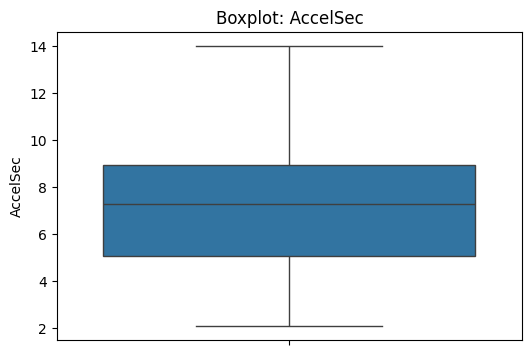

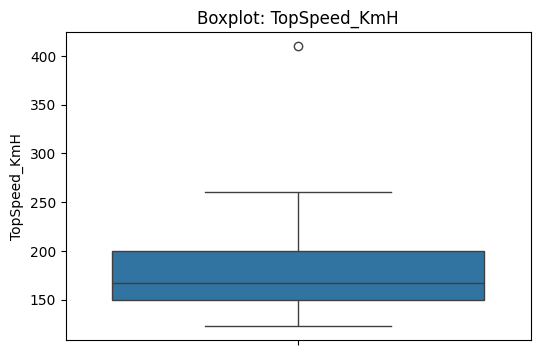

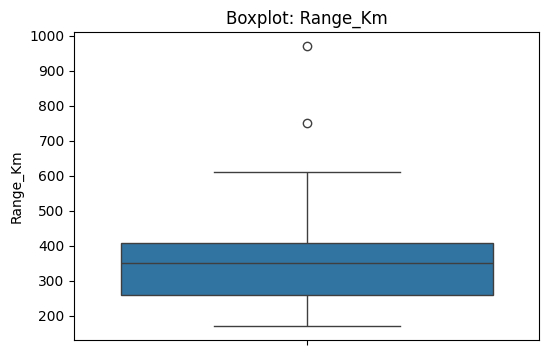

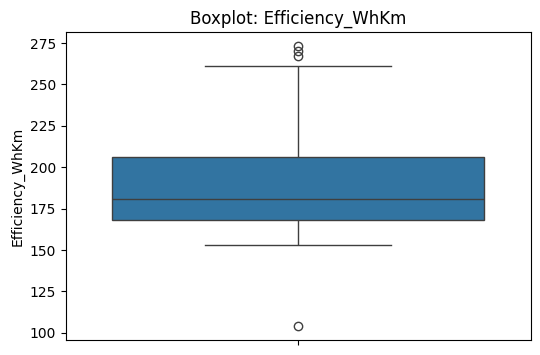

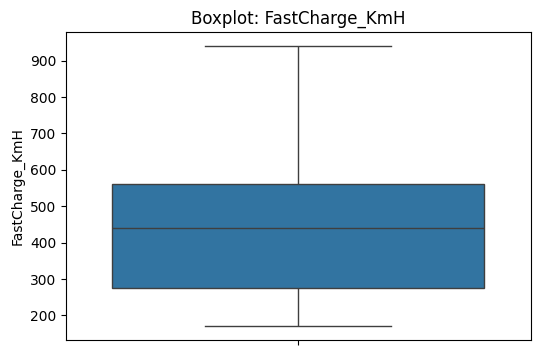

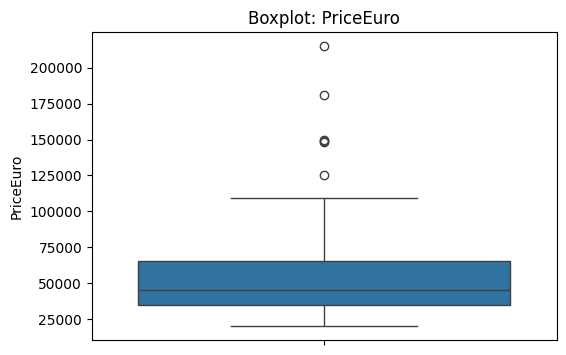

In [45]:
#boxplot für alle numerische Spalten
numeric_cols = list(df_clean.select_dtypes(include="number").columns)
numeric_cols.remove('connector')
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

## Speicherplatz

In [23]:
# df_clean.memory_usage(deep=True)
mem_before = df_clean.memory_usage(deep=True).sum()
mem_before


np.int64(44259)

In [24]:
#Memory optimisation
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_Km         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   connector        98 non-null     int64  
 7   FastCharge_KmH   98 non-null     float64
 8   RapidCharge      98 non-null     object 
 9   PowerTrain       98 non-null     object 
 10  PlugType         98 non-null     object 
 11  BodyStyle        98 non-null     object 
 12  Seats            98 non-null     object 
 13  PriceEuro        98 non-null     int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.5+ KB


In [26]:
#optimierung
df_opti = df_clean.copy()
for i in df_opti.columns:   
        if df_opti[i].dtype=="float64":
            is_integer = (df_opti[i]%1==0).all()  #if column values integer?
            if is_integer:
                # df[[i]] = df[[i]].astype('integer')
                df_opti[[i]] = df_opti[[i]].astype(int)
            else:
                df_opti[[i]] = df_opti[[i]].apply(pd.to_numeric, downcast="float")
        elif df_opti[i].dtype=="int64":
            df_opti[[i]] = df_opti[[i]].apply(pd.to_numeric, downcast="integer")
        elif df_opti[i].dtype=="object":
            if df_opti[i].unique().size/len(df_opti)<0.8:   # weniger 80%??? oder <1
                df_opti[[i]] = df_opti[[i]].astype('category')
df_opti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            98 non-null     category
 1   Model            98 non-null     object  
 2   AccelSec         98 non-null     float32 
 3   TopSpeed_KmH     98 non-null     int16   
 4   Range_Km         98 non-null     int16   
 5   Efficiency_WhKm  98 non-null     int16   
 6   connector        98 non-null     int16   
 7   FastCharge_KmH   98 non-null     int64   
 8   RapidCharge      98 non-null     category
 9   PowerTrain       98 non-null     category
 10  PlugType         98 non-null     category
 11  BodyStyle        98 non-null     category
 12  Seats            98 non-null     category
 13  PriceEuro        98 non-null     int32   
dtypes: category(6), float32(1), int16(4), int32(1), int64(1), object(1)
memory usage: 6.7+ KB


In [29]:
#Vergleich Speicherplatz
mem_after = df_opti.memory_usage(deep=True).sum()

print(f"War: {mem_before}\nJetzt: {mem_after}")
#Reduction
reduction = ((mem_before-mem_after)/mem_before)
print("-"*30)
print(f"Reduktion um: {reduction*100:0.2f}%")

vergleich_tabelle = pd.DataFrame({
    "column": df_clean.columns,
    "dtype": df_clean.dtypes.values,
    "dtype_opti": df_opti.dtypes.values
})

print(f"\nVergleichtabelle:\n{vergleich_tabelle}")



War: 44259
Jetzt: 14833
------------------------------
Reduktion um: 66.49%

Vergleichtabelle:
             column    dtype dtype_opti
0             Brand   object   category
1             Model   object     object
2          AccelSec  float64    float32
3      TopSpeed_KmH    int64      int16
4          Range_Km    int64      int16
5   Efficiency_WhKm    int64      int16
6         connector    int64      int16
7    FastCharge_KmH  float64      int64
8       RapidCharge   object   category
9        PowerTrain   object   category
10         PlugType   object   category
11        BodyStyle   object   category
12            Seats   object   category
13        PriceEuro    int64      int32


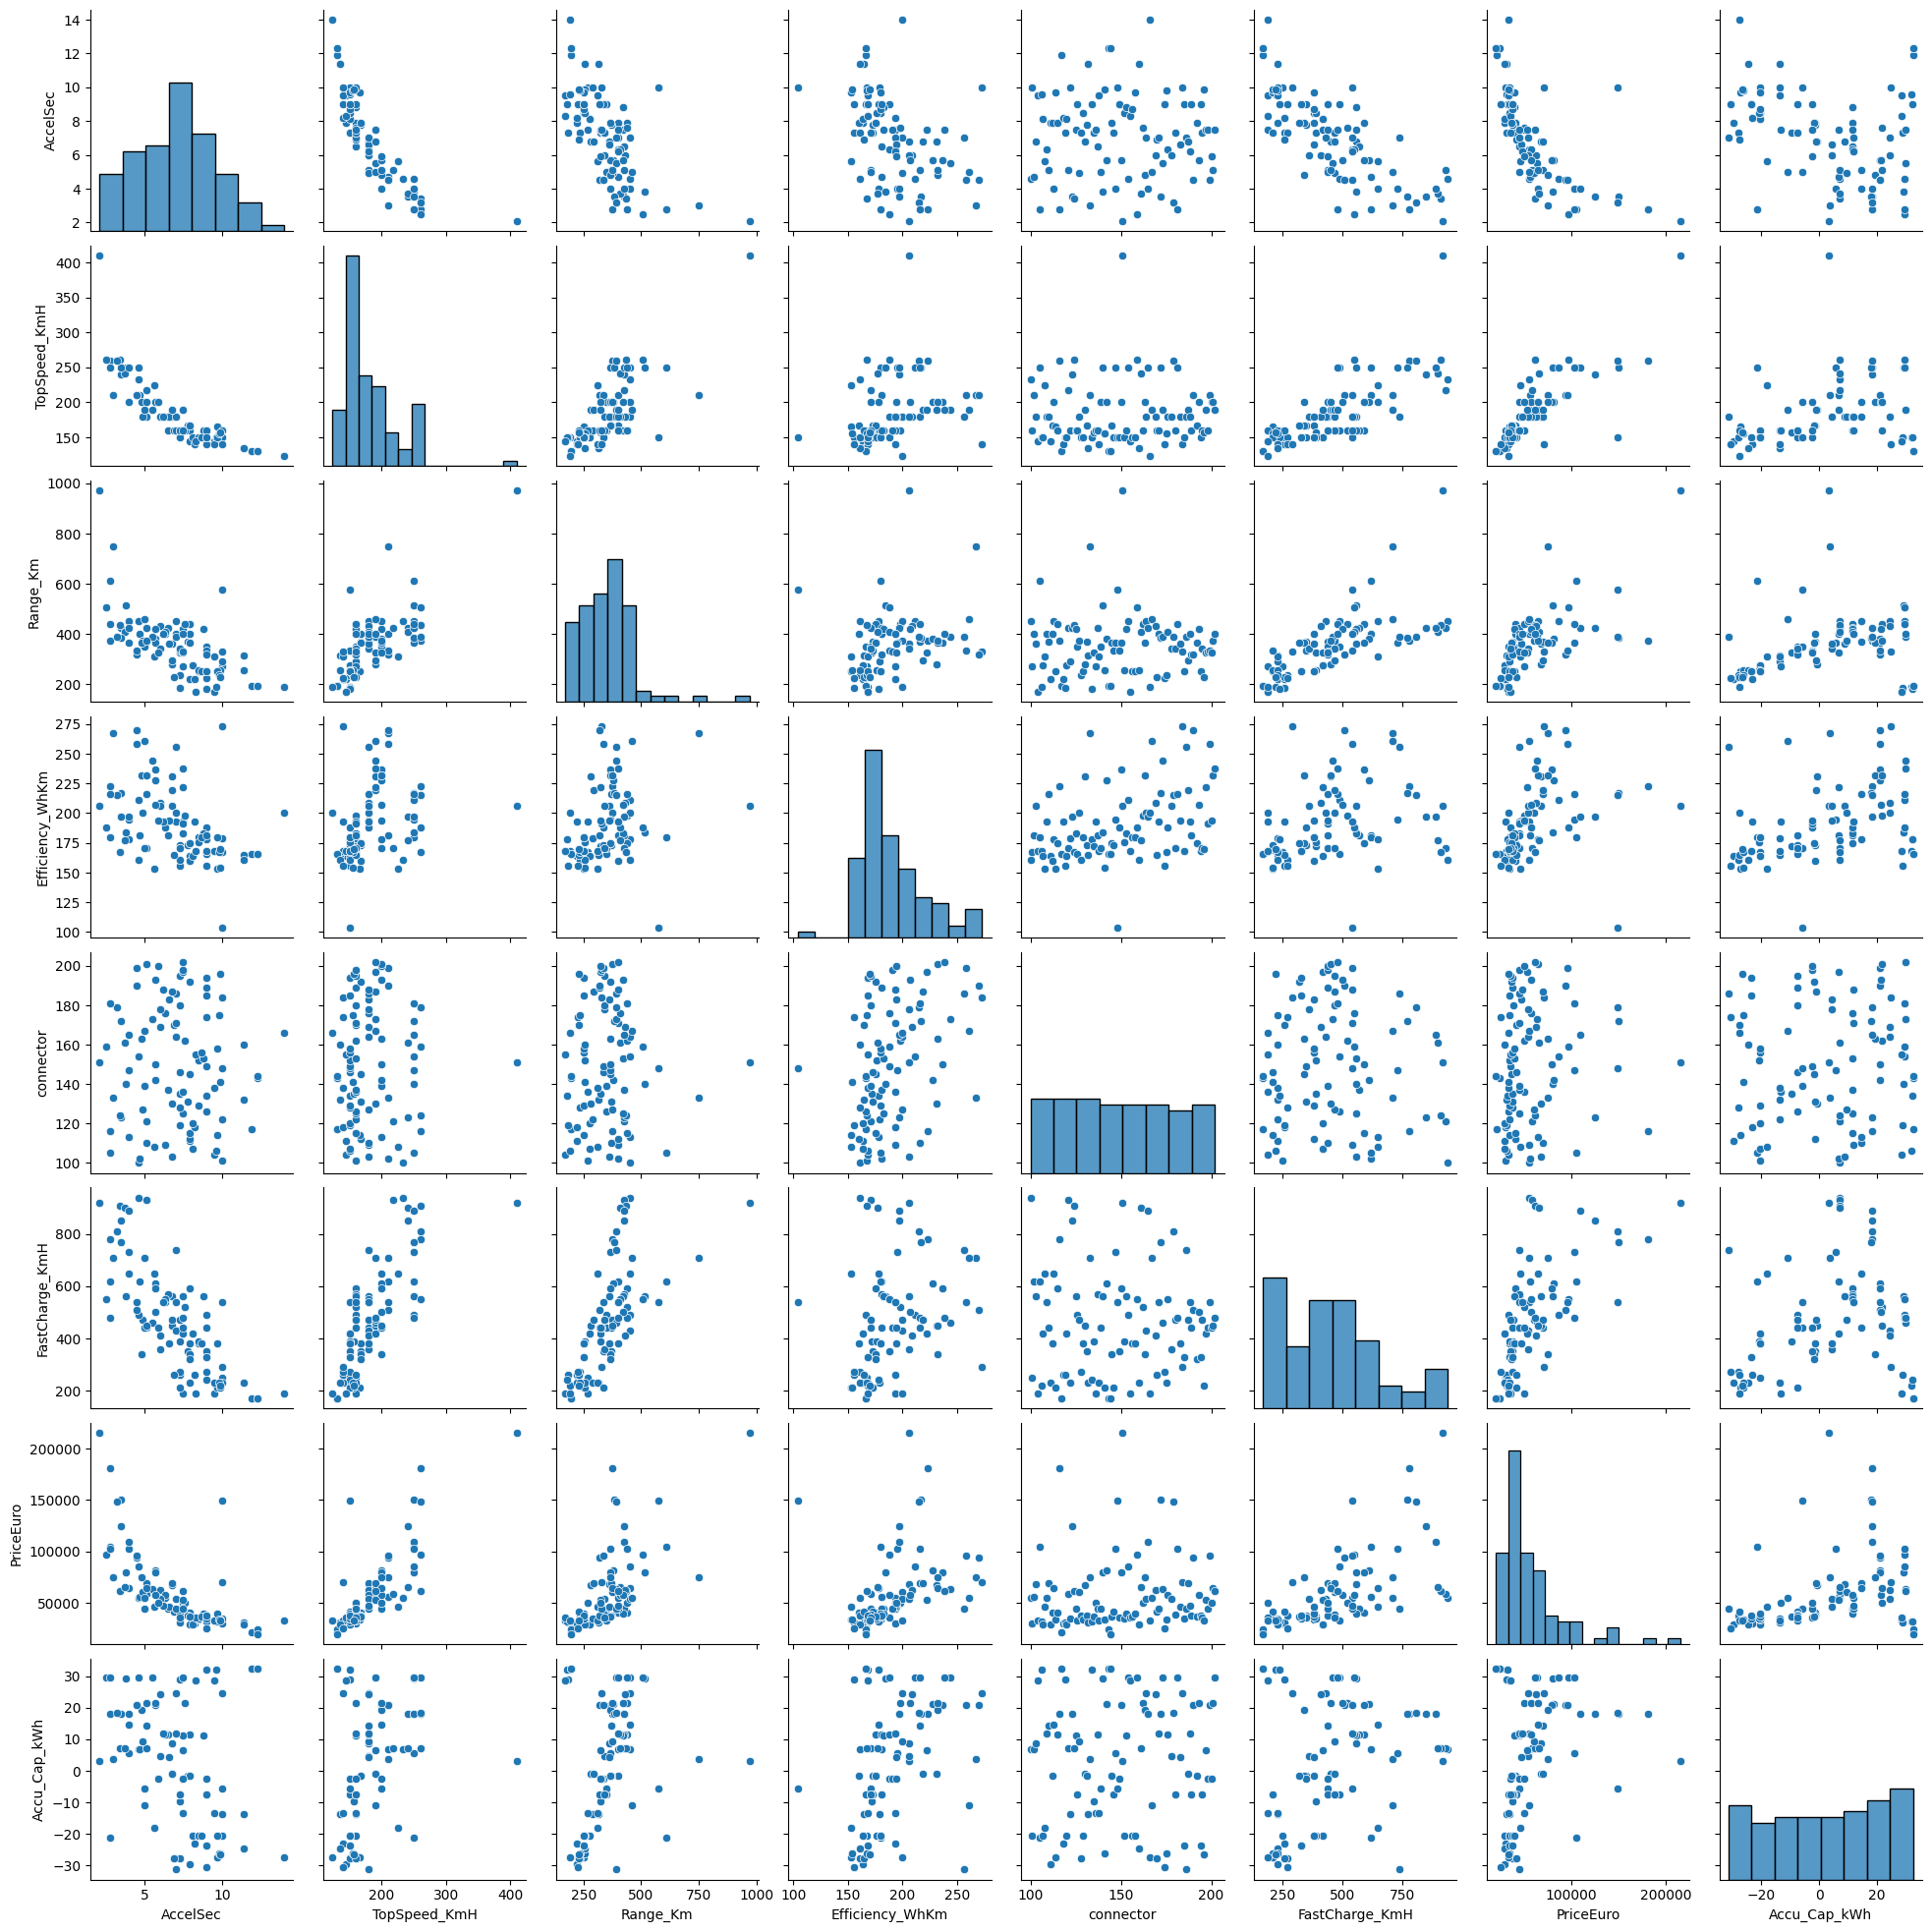

In [46]:
#Pairplot

# # nur numerische Spalten auswählen
# numeric_cols = list(df_opti.select_dtypes(include="number"))
# numeric_cols.remove('connector')
# # sns.pairplot(df_opti[numeric_cols])
sns.pairplot(data=df_opti)
# plt.show()


In [47]:
# Features
df_opti["Accu_Cap_kWh"] = (df_opti["Efficiency_WhKm"] /1000)* (df_opti["Range_Km"])
df_opti.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Accu_Cap_kWh
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940,Yes,AWD,Type 2 CCS,Sedan,5.0,55480,72.45
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250,Yes,RWD,Type 2 CCS,Hatchback,?,30000,45.09
2,Polestar,2,4.7,210,400,181,102,620,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,72.40
3,BMW,iX3,6.8,180,360,206,103,560,Yes,RWD,Type 2 CCS,SUV,5.0,68040,74.16
4,Honda,e,9.5,145,170,168,104,190,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997,28.56
